In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
plt.style.use(['science','notebook','grid'])

# 2 Dimensional picture

## Cartesian Coordinate

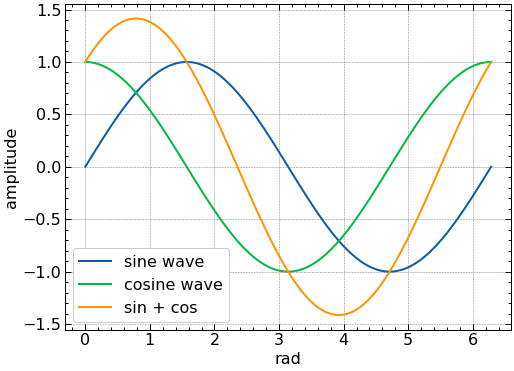

In [12]:
# The Functions we want to plot
x= np.linspace(0,2*np.pi,100)

y1= np.sin(x)
y2= np.cos(x)
y3= np.sin(x)+np.cos(x)

# the settings of the diagram

plt.xlabel("rad")
plt.ylabel('amplitude')

plt.plot(x,y1,label="sine wave")
plt.plot(x,y2,label='cosine wave')
plt.plot(x,y3,label='sin + cos')

plt.legend()
# plt.legend(loc='upper right', fontsize=12 , ncol=3)
plt.show()

## Polar Coordinate

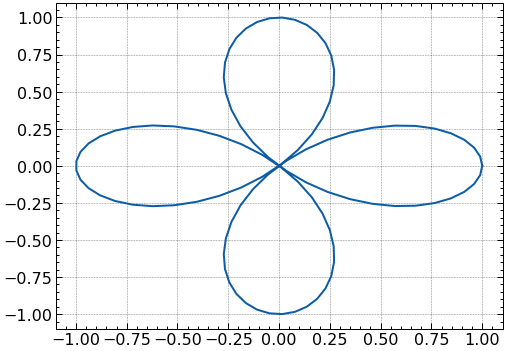

In [20]:
theta=np.linspace(0, 2*np.pi, 100)
r= np.cos(theta*(2))
x= r*np.cos(theta)
y= r*np.sin(theta)

plt.plot(x,y)
plt.show()

## Special projects

### The system of two consecutive first-order process
$$ A \xrightarrow{\text{$k_1$}} I \xrightarrow{\text{$k_2$}} P $$ \
$$ \frac{d[A]}{dt} = -k_1[A] $$ \
$$ \frac{d[I]}{dt} = k_1[A] - k_2[I]  $$ \
$$ [C] = [A]_0-[A]-[B] $$

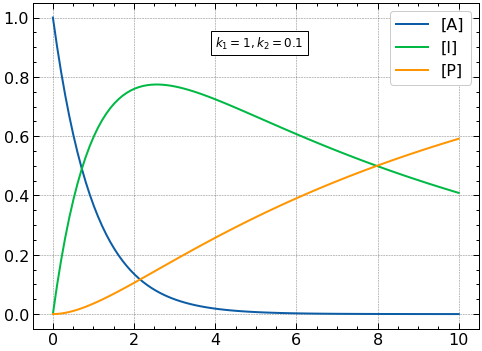

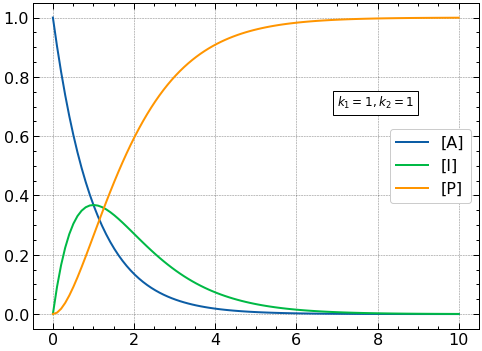

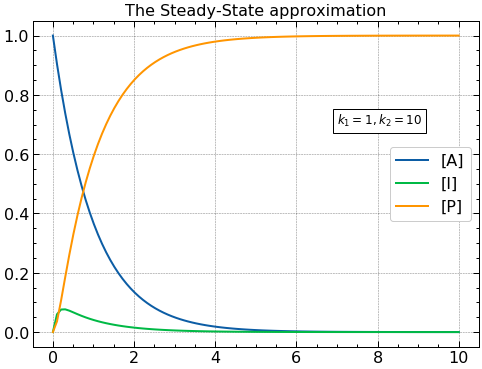

In [22]:
from scipy.integrate import odeint

for i in range(-1,2):
    k_1= 1
    k_2= 1*10**i
    a=1 # this initial value cannot put into the dSdt function, since it is set to be solved in odient function 
    def dSdt(S,t):
        x,y = S # [A]=a-x, [B]=y
        return ([-k_1*(x),k_1*(x)-k_2*y])
    x0= 1
    y0= 0
    S0= [x0,y0]
    t=np.linspace(0,10,100)
    sol= odeint(dSdt,S0,t)
    sol1=sol.T[0]
    sol2=sol.T[1]
    sol3=1-(sol.T[0])-(sol.T[1])
    if i==-1:
        plt.plot(t,sol1,label='[A]')
        plt.plot(t,sol2,label='[I]')
        plt.plot(t,sol3,label='[P]')
        plt.text(4, 0.9, '$k_1=1, k_2=0.1$',bbox=dict(facecolor='white', edgecolor='black'), size=12)
        pass
    if i==0:
        plt.plot(t,sol1,label='[A]')
        plt.plot(t,sol2,label='[I]')
        plt.plot(t,sol3,label='[P]')
        plt.text(7, 0.7, '$k_1=1, k_2=1$',bbox=dict(facecolor='white', edgecolor='black'), size=12)
        pass
    if i==1:
        plt.plot(t,sol1,label='[A]')
        plt.plot(t,sol2,label='[I]')
        plt.plot(t,sol3,label='[P]')
        plt.text(7, 0.7, '$k_1=1, k_2=10$',bbox=dict(facecolor='white', edgecolor='black'), size=12)
        plt.title('The Steady-State approximation')
    plt.legend()
    plt.show()

#### The data plots of experiments of general chemistry

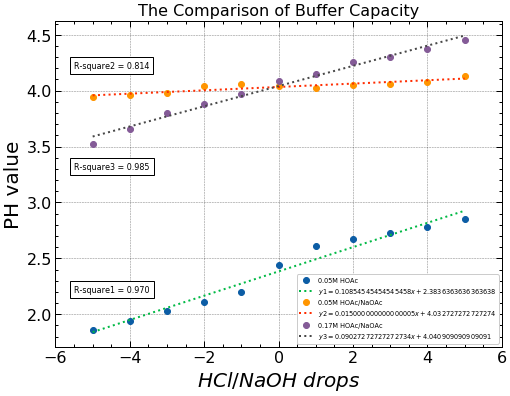

<Figure size 720x216 with 0 Axes>

In [33]:
x= np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5])
y1= np.array([1.86, 1.94, 2.03, 2.11, 2.20, 2.44, 2.61, 2.67, 2.73, 2.78, 2.85])
y2= np.array([3.94,3.96,3.98,4.04,4.06,4.04,4.02,4.05,4.06,4.08,4.13])
y3= np.array([3.52,3.66,3.80,3.88,3.97,4.09,4.15,4.26,4.30,4.37,4.45])
corr_matrix1 = np.corrcoef(x, y1)
corr1 = corr_matrix1[0,1]
R_sq1 = corr1**2
corr_matrix2 = np.corrcoef(x, y2)
corr2 = corr_matrix2[0,1]
R_sq2 = corr2**2
corr_matrix3 = np.corrcoef(x, y3)
corr3 = corr_matrix3[0,1]
R_sq3 = corr3**2
m1,b1= np.polyfit(x,y1,1)
m2,b2= np.polyfit(x,y2,1)
m3,b3= np.polyfit(x,y3,1)
plt.plot(x,y1,'o',label="0.05M HOAc")
plt.plot(x,m1*x+b1,label=f'$y1 = {m1}x {b1:+}$'.format(round(m1, 3), round(b1, 3)),linestyle='dotted')
plt.annotate("R-square1 = {:.3f}".format(R_sq1), (-5.5, 2.2),bbox=dict(facecolor='white', edgecolor='black'), size=8)
plt.plot(x,y2,'o',label='0.05M HOAc/NaOAc')
plt.plot(x,m2*x+b2,label=f'$y2 = {m2}x {b2:+}$'.format(round(m2, 3), round(b2, 3)),linestyle='dotted')
plt.annotate("R-square2 = {:.3f}".format(R_sq2), (-5.5, 4.2),bbox=dict(facecolor='white', edgecolor='black'), size=8)
plt.plot(x,y3,'o',label='0.17M HOAc/NaOAc')
plt.plot(x,m3*x+b3,label=f'$y3 = {m3}x {b3:+}$'.format(round(m3, 3), round(b3, 3)),linestyle='dotted')
plt.annotate("R-square3 = {:.3f}".format(R_sq3), (-5.5, 3.3),bbox=dict(facecolor='white', edgecolor='black'), size=8)
plt.xlim([-6,6])
plt.title('The Comparison of Buffer Capacity')
plt.xlabel ('$HCl/NaOH\ drops$',fontsize=20)
plt.ylabel ('PH value',fontsize=20)
plt.legend(loc='lower right',fontsize='6.5')
plt.figure(figsize=(10,3))
plt.show()

#### Radial Distribution Function of Hydrogen Atom

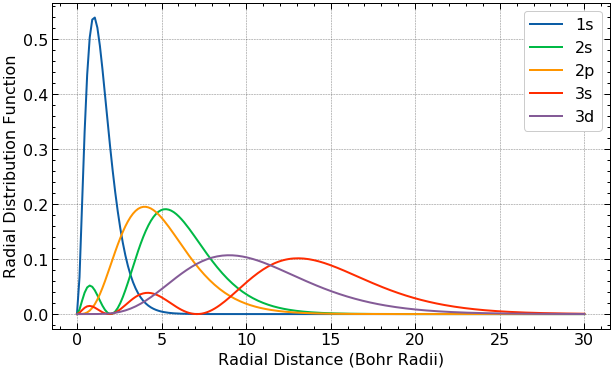

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import genlaguerre
import math

# Constants
a0 = 1.0  # Bohr radius
r = np.linspace(0, 30, 200)

def radial_wavefunction(r, n, l):
    laguerre = genlaguerre(n - l - 1, 2 * l + 1)(2 * r / (n * a0))
    prefactor = np.sqrt(((2 / (n * a0))**3) * (math.factorial(n - l - 1)) / (2 * n * math.factorial(n + l)))
    exponent = np.exp(-r / (n * a0))
    return prefactor * (2 * r / (n * a0))**l * exponent * laguerre

def radial_distribution_function(r, n, l):
    return (r**2) * (radial_wavefunction(r, n, l)**2)

# Define the quantum numbers for the orbitals
orbitals = [
    {'n': 1, 'l': 0, 'label': '1s'},
    {'n': 2, 'l': 0, 'label': '2s'},
    {'n': 2, 'l': 1, 'label': '2p'},
    {'n': 3, 'l': 0, 'label': '3s'},
    {'n': 3, 'l': 2, 'label': '3d'},
]

# Plot all the RDFs in one diagram
plt.figure(figsize=(10, 6))
for orbital in orbitals:
    rdf = radial_distribution_function(r, orbital['n'], orbital['l'])
    plt.plot(r, rdf, label=orbital['label'])

plt.xlabel('Radial Distance (Bohr Radii)')
plt.ylabel('Radial Distribution Function')
plt.legend()
plt.savefig('RDF.png')
plt.show()

#### Lengengre Polynomials for $x= cos(\theta)$

## 3 Dimensional Pictures

### Parametric Curves

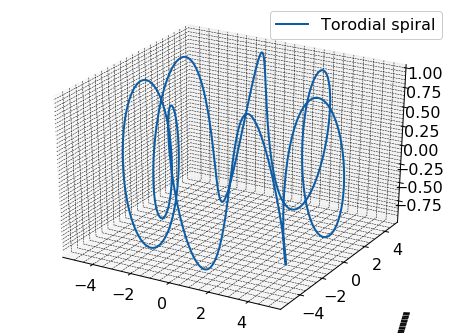

In [37]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
t= np.linspace(0,2*np.pi,1000)
x= (4+np.sin(7*t))*np.cos(t)
y= (4+np.sin(7*t))*np.sin(t)
z= np.cos(7*t)
ax.plot(x, y, z, label='Torodial spiral')
ax.legend()
plt.show()

### Spherical Polar Coordinate

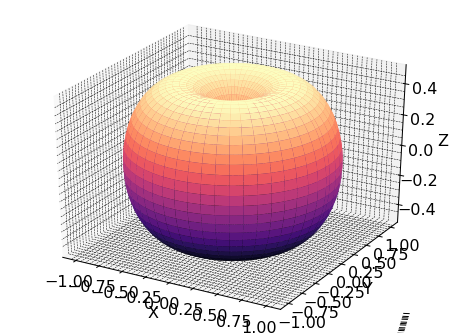

In [47]:
phi= np.linspace(0,2*np.pi,100)
theta= np.linspace(0,np.pi,100)
theta, phi = np.meshgrid(theta, phi)
r=np.sin(theta)
x= r*np.cos(phi)*np.sin(theta)
y= r*np.sin(phi)*np.sin(theta)
z= r*np.cos(theta)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='magma')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

#### Spherical Harmonic

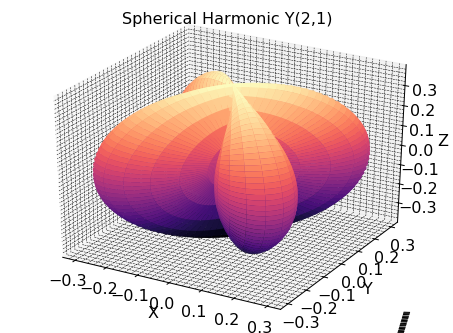

In [49]:
theta, phi = np.linspace(0, np.pi, 100), np.linspace(0, 2 * np.pi, 100)
Theta, Phi = np.meshgrid(theta, phi)
from scipy.special import sph_harm
# Replace l and ml with your chosen quantum numbers
l = 2
ml = 1

Y_lm = sph_harm(ml, l, Theta, Phi)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Spherical to Cartesian coordinates transformation
x = np.abs(Y_lm) * np.sin(Theta) * np.cos(Phi)
y = np.abs(Y_lm) * np.sin(Theta) * np.sin(Phi)
z = np.abs(Y_lm) * np.cos(Theta)

ax.plot_surface(x, y, z, cmap='magma')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f'Spherical Harmonic Y({l},{ml})')


plt.savefig("hydrogen_orbital.png")

# Enable interactive mode (for interactive rotation)
plt.ion()
# Show the plot (optional)
plt.show()

### Contour Plots

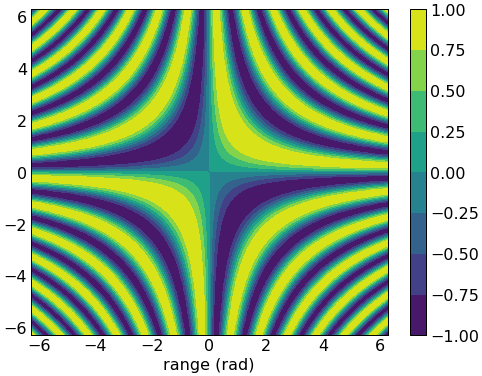

In [51]:
x= np.linspace(-2*np.pi,2*np.pi,100)
y= np.linspace(-2*np.pi,2*np.pi,100)
x,y=np.meshgrid(x,y)
z = np.sin(x*y)
plt.contourf(x,y,z)#vmax=0.5,vim=0.5:#cmap='plasma'
plt.colorbar()
plt.xlabel('range (rad)')
plt.show()